# Feed Forward Neural Network : MNIST Classifier

In [79]:
!pip install tensorflow

## Load MNIST Dataset: Digit Classifier

In [80]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print("="*20)
print("First training example")
print(x_train[0])
print(y_train[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
First training example
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0 

## Flatten input data

In [81]:
# Flatten 28x28 images to 784-length vectors and normalize to [0, 1]
x_train = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test = x_test.reshape(-1, 784).astype('float32') / 255.0

print(x_train.shape, x_test.shape)

print("="*20)
print("First training input after flattening")
print(x_train[0])

(60000, 784) (10000, 784)
First training input after flattening
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.    

## One-hot encode the labels

Represent the labels as oneg-hot encodeing. example: 
</br>y = 1 is represented as [0,1,0,0,0,0,0,0,0]
</br>y = 2 is represented as [0,0,1,0,0,0,0,0,0]
</br>...
</br>y = 9 is represented as [0,0,0,0,0,0,0,0,1]

In [82]:
y_train = pd.get_dummies(y_train).astype(int).values
y_test = pd.get_dummies(y_test).astype(int).values

print(y_train.shape, y_test.shape)

print("="*20)
print("First training label after one-hot encoding")
print(y_train[0])

(60000, 10) (10000, 10)
First training label after one-hot encoding
[0 0 0 0 0 1 0 0 0 0]


## Create the training Model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(216, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(216, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 216)            │       169,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 216)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 216)            │        46,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 216)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │         2,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,602 (853.91 KB)

 Trainable params: 218,602 (853.91 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
history = model.fit(x = x_train, y = y_train, epochs = 50, batch_size = 100, validation_split = 0.2, verbose = 1)

Epoch 1/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8344 - loss: 0.5285 - val_accuracy: 0.9488 - val_loss: 0.1749
Epoch 2/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9259 - loss: 0.2501 - val_accuracy: 0.9612 - val_loss: 0.1304
Epoch 3/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9416 - loss: 0.1988 - val_accuracy: 0.9658 - val_loss: 0.1123
Epoch 4/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9492 - loss: 0.1710 - val_accuracy: 0.9689 - val_loss: 0.1052
Epoch 5/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9534 - loss: 0.1558 - val_accuracy: 0.9723 - val_loss: 0.0942
Epoch 6/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9586 - loss: 0.1383 - val_accuracy: 0.9738 - val_loss: 0.0901
Epoch 7/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9613 - loss: 0.1290 - val_accuracy: 0.9751 - val_loss: 0.0887
Epoch 8/50
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9627 - loss: 0.1215 - val_accuracy: 0.


## Plot Training Curves

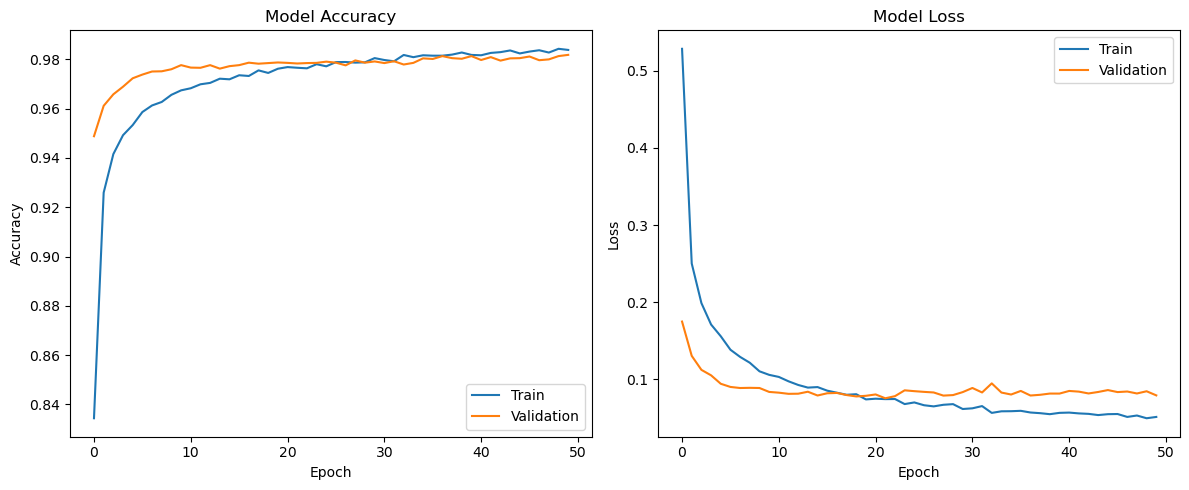

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

# loss subplot
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.tight_layout()
plt.show()

## Evaluate Test Data

In [86]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=100, verbose=1)
print("test loss, test acc:", results)

Evaluate on test data
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9810 - loss: 0.0779  
test loss, test acc: [0.07790601998567581, 0.9810000061988831]


## Mislabelled data sample

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
Total misclassified: 190 / 10000 (1.90%)



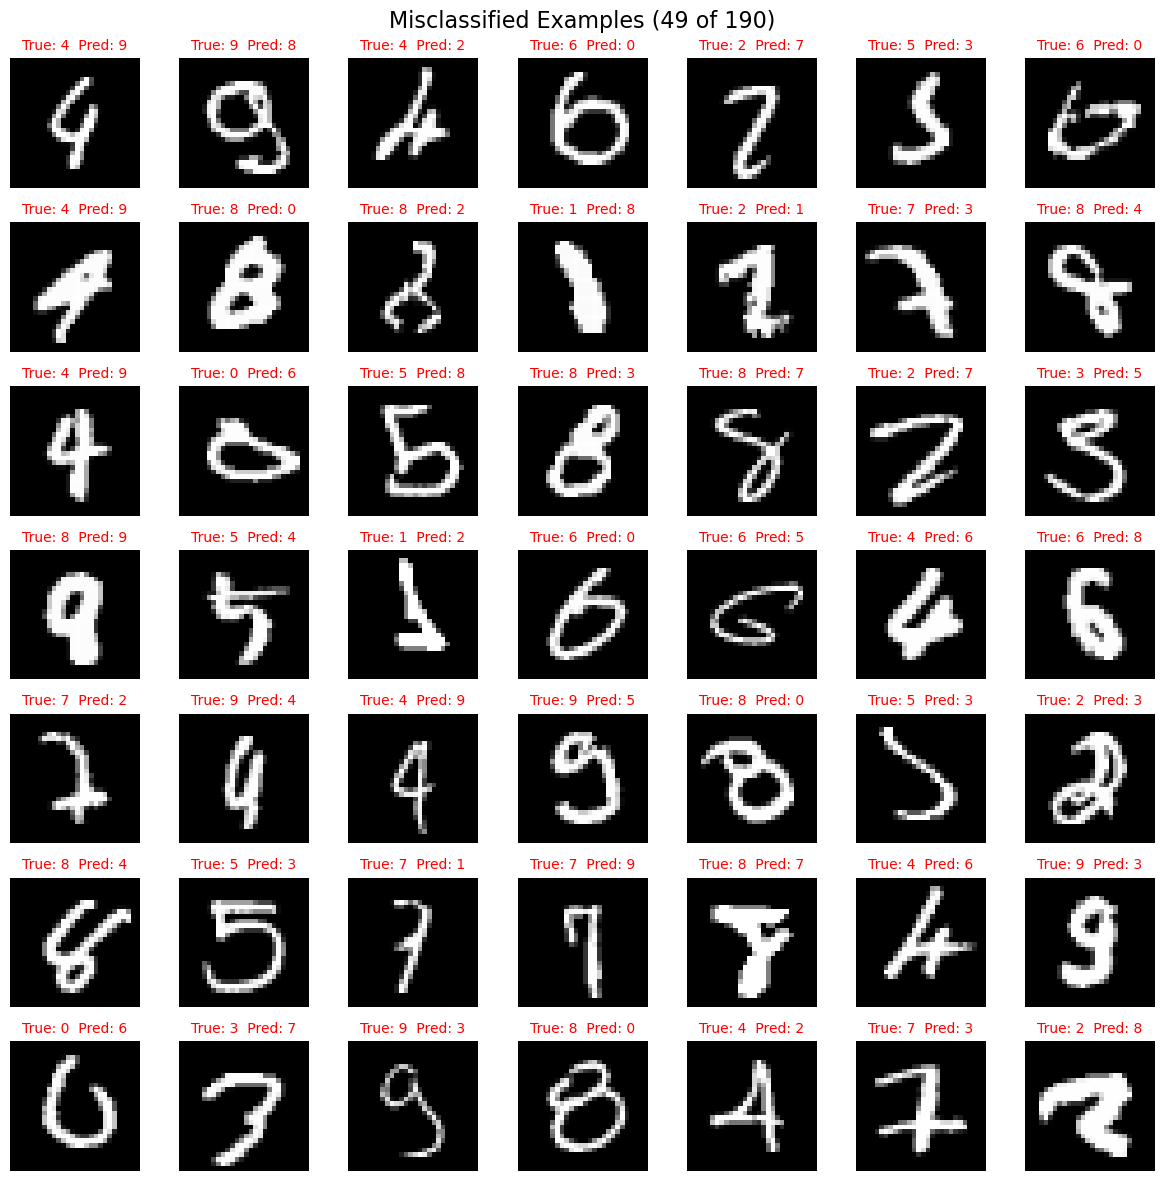

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
predictions = model.predict(x_test, batch_size=100, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Find incorrect predictions
incorrect_idx = np.where(predicted_labels != true_labels)[0]
print(f"Total misclassified: {len(incorrect_idx)} / {len(y_test)} ({len(incorrect_idx)/len(y_test)*100:.2f}%)\n")

# Display a sample of misclassified images
num_display = min(49, len(incorrect_idx))
fig, axes = plt.subplots(7, 7, figsize=(12, 12))
fig.suptitle(f"Misclassified Examples ({num_display} of {len(incorrect_idx)})", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_display:
        idx = incorrect_idx[i]
        img = x_test[idx].reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"True: {true_labels[idx]}  Pred: {predicted_labels[idx]}", color='red', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Conclusion

A simple Feed Forward Neural Network with two hidden layers (216 neurons each, ReLU activation) and Dropout (0.5) was trained on the MNIST dataset for 50 epochs.

**Results:**
- **Test Accuracy:** 98.10%
- **Test Loss:** 0.0779
- **Misclassified:** 190 out of 10,000 test images (1.90% error rate)

**Error Analysis:**
- Many misclassified digits are visually ambiguous - even to the human eye (e.g., a poorly written `4` mistaken for `9`, or a `6` confused with `0`).
- The `4`<->`9` pair is the single most frequent confusion, appearing repeatedly in the error samples - likely because both share a similar vertical stroke with a loop or angle at the top.
- Digit `8` is particularly error-prone, being confused with `0`, `3`, `4`, `7`, and `9` depending on how its loops are drawn.
- Other common confusion pairs include `6`/`0`, `7`/`2`, `7`/`3`, `5`/`3`, `5`/`8`, and `9`/`3` - all sharing similar stroke patterns or curvature.

**Key Takeaways:**
- **Flattening & Normalization:** The 28×28 images were reshaped to 784-length vectors and scaled to [0, 1] for stable training.
- **One-Hot Encoding:** Labels were converted to one-hot vectors to work with `categorical_crossentropy` loss.
- **Dropout Regularization:** Adding Dropout (0.5) after each hidden layer helped reduce overfitting, keeping training and validation curves close together.
- **Room for Improvement:** Convolutional Neural Networks (CNNs) can achieve >99% accuracy on MNIST by leveraging spatial structure in the images, which a fully connected network ignores.